# AnalyzeEDGBWaveforms.ipynb

Maria Okounkova (mokounkova@pasadena.edu)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

### Helper functions

Functions for computing and subtracting peak times

In [3]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

### Read in the waveforms

In [4]:
## Read in the extrapolated modes
def ReadWaveformModes(file, mode_l = '2', mode_m = '2'):
    """ 
        File is the file containing the extrapolated waveform that we want to read in 
        mode_l is the l spin-weighted spherical harmonic mode of the waveform that we would like (default l = 2), 
        and mode_m is the m spin-weighted spherical harmonic mode that we would like (default m = 2)
    """

    ## Read in the data
    f = h5py.File(file, 'r')
    
    ## grab the length of the waveform first
    data = f['Extrapolated_N2.dir']['Y_l' + mode_l + '_m' + mode_m + '.dat']
    time = np.array(data[:,0])
    
    ## Real and imaginary parts of the waveform
    data_real = np.array(data[:,1])
    data_imag = np.array(data[:,2])
    
    ## Now subtract off the peak time
    amp = np.sqrt(data_real**2 + data_imag**2)
    time = time - time[np.argmax(amp)]

    return time, data_real, data_imag
    

### Plot the waveforms we want

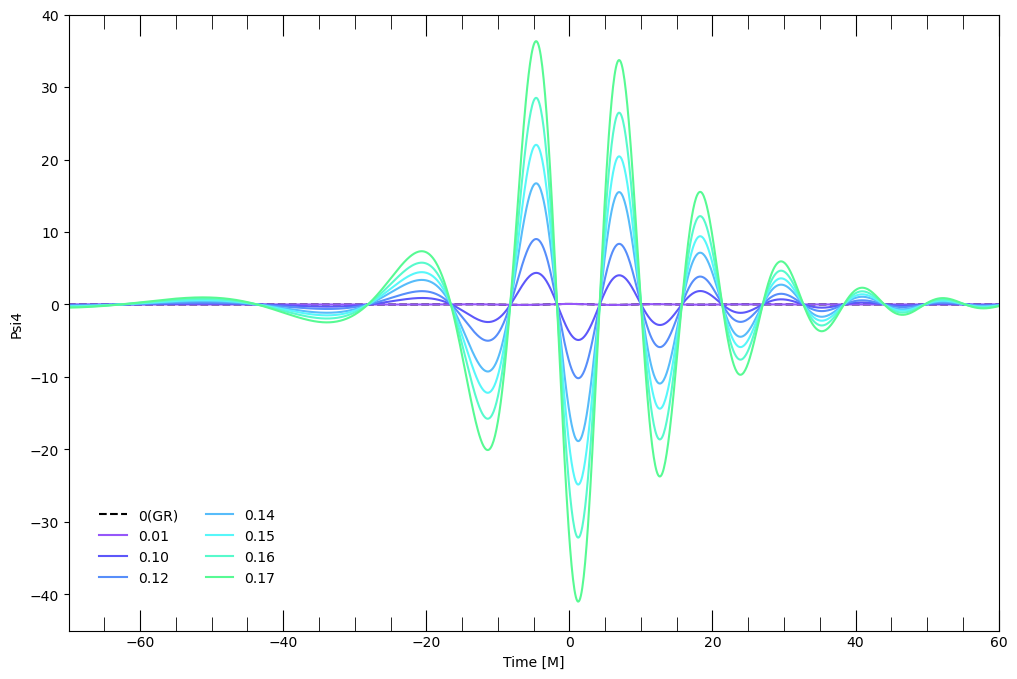

In [5]:
plt.figure(figsize=(12, 8))

## Edit to include the file that you want
time0p0, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
time0p01, data_real0p01, data_imag0p01 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
time0p1, data_real0p1, data_imag0p1 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p1.h5')
time0p12, data_real0p12, data_imag0p12 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p12.h5')
time0p14, data_real0p14, data_imag0p14 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p14.h5')
time0p15, data_real0p15, data_imag0p15 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p15.h5')
time0p16, data_real0p16, data_imag0p16 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p16.h5')
time0p17, data_real0p17, data_imag0p17 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p17.h5')
    
plt.plot(time0p0, data_real0p0, linestyle='--', color='Black', label='0(GR)') 
plt.plot(time0p01, data_real0p01, color='#9657fa', label='0.01')
plt.plot(time0p1, data_real0p1, color='#5d57fa', label='0.10')
plt.plot(time0p12, data_real0p12, color='#578efa', label='0.12')
plt.plot(time0p14, data_real0p14, color='#57bcfa', label='0.14')
plt.plot(time0p15, data_real0p15, color='#57f7fa', label='0.15')
plt.plot(time0p16, data_real0p16, color='#57facc', label='0.16')
plt.plot(time0p17, data_real0p17, color='#57fa93', label='0.17')

plt.legend(loc='lower left', ncol=2, borderpad=1, bbox_to_anchor=(0.01,0.04), frameon=False)
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)
plt.tick_params(axis='x', which='minor', direction='in', length=10, top=True)
plt.tick_params(axis='x', which='major', direction='in', length=15, top=True)
plt.xlim([-70,60])
plt.ylim([-45,40])
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
plt.show()